#### Can You Save The Drowning Swimmer?

Solution to https://fivethirtyeight.com/features/can-you-save-the-drowning-swimmer/

To determine the total time it will take, we're going to need some simple geometry and _either_ some calculus, or a little brute force computation.

![Pythagorean](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Pythagorean.svg/260px-Pythagorean.svg.png)

The total distance traveled by the lifesaver will be the distance ran along shore ($d_r$) (between 0 and 100 metres) plus the distance swam ($d_s$). The latter will be the hypotenuse of the triangle with sides $100-d_r$ and $100$, or:

$$d_s = \sqrt{(100-d_r)^2 + 100^2} $$

The total time will be the sum of the two distance components $d_r$ and $d_s$ divided by the speed with which the lifesaver can cover each land ($v_r$) and water ($v_s$), respectively. These are given as:

$$v_r = \frac{100m}{15sec}$$
.
$$v_s = \frac{100m}{17sec}$$

Putting it together, we have the total time $t$ as:

$$t = \frac{\sqrt{(100-d_r)^2 + 100^2}}{v_s} + \frac{d_r}{v_r} $$

First, we'll take a numerical approach to finding the running distance which minimizes the total time. 

Populating the interactive namespace from numpy and matplotlib


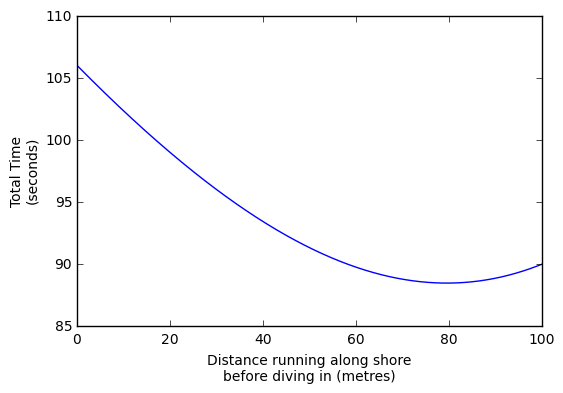

In [1]:
%pylab inline

def duration(d_r,v_r=100/15.0,v_s=100/75.0):
    return np.sqrt(np.power((100-d_r),2) + 10000)/v_s + d_r/v_r

Rs = np.linspace(0,100,10000)
Ds = duration(Rs)
fig, ax = plt.subplots(1,1)
ax.plot(Rs,Ds)
ax.set_xlabel('Distance running along shore\nbefore diving in (metres)')
ax.set_ylabel('Total Time\n(seconds)')
plt.show()

We can see that the fastest time when the lifesaver runs ~80 metres before diving into the water. Doing so, it will take take ~88 seconds.

In [2]:
best_d_r = Rs[np.argmin(Ds)]
print "Best distance running:",best_d_r
print "Best time:", duration(best_d_r)

Best distance running: 79.5879587959
Best time: 88.484692284


With the above numerical approach, we can get an arbitrarily precise approximation of the solution. However, with a little calculus, we can get an exact answer.

The minimum of the duration function can be found exactly by taking the derivative and setting it equal to zero.

$$\delta/\delta d_r \left[\frac{\sqrt{(100-d_r)^2 + 100^2}}{v_s} + \frac{d_r}{v_r} \right] = 0$$
.
$$\frac {1}{v_r} - \frac{100-d_r}{s \sqrt{(100-d_r)^2 + 100^2} } = 0$$

Solving for $d_r$:

$$d_r = 100 - 100 \sqrt{\frac{v_s^2}{v_r^2 - v_s^2}}$$

In [3]:
v_r=100/15.0
v_s=100/75.0

d_r = 100 - 100 * np.sqrt(v_s**2/(v_r**2 - v_s**2))

print "Best distance running:",d_r
print "Best time:", duration(d_r)

Best distance running: 79.5875854768
Best time: 88.4846922835
